In [ ]:
"""
Update Parameters Here
"""
FILE = "Quaks"
ADDRESS = "0xd9d1c2623fbb4377d9bf29075e610a9b8b4805b4"  # set to "" if you want to print graphs for all addresses that minted more than MIN_TOKENS_MINTED
TOKEN_COL = "TOKEN_ID"
MIN_TOKENS_MINTED = 25

""" 
Optional parameters
Customise these values and set ZOOM_IN to True if you want to zoom in on a specific range
"""
ZOOM_IN = False

LOWER_BOUND = 0
UPPER_BOUND = 6000
TOP_N = 6000

In [ ]:
"""
@author: mdigi14
"""

import pandas as pd
import matplotlib.pyplot as plt
import math


"""
Plot params
"""
plt.rcParams.update({"figure.facecolor": "white", "savefig.facecolor": "white"})

"""
Helper Functions
"""


def print_graph(grifter_address, MINTING_DB, RARITY_DB, zoom_in=False):
    if zoom_in:
        lower_bound = LOWER_BOUND
        upper_bound = UPPER_BOUND
        top_n = TOP_N
    else:
        # Count number of tokens in Rarity DB and round up to nearest 100
        TOKEN_COUNT = int(math.ceil(max(RARITY_DB[TOKEN_COL] / 100.0)) * 100)
        upper_bound = top_n = TOKEN_COUNT
        lower_bound = 0

    GRIFTER_DB = MINTING_DB[MINTING_DB["to_account"] == grifter_address]

    tokens_minted = GRIFTER_DB["TOKEN_ID"]
    rarity_ranks = GRIFTER_DB["rank"]

    if len(tokens_minted) >= MIN_TOKENS_MINTED or ADDRESS != "":

        if TOKEN_COL == "TOKEN_NAME":
            RARITY_DB["TOKEN_ID"] = (
                RARITY_DB["TOKEN_NAME"].str.split("#").str[1].astype(int)
            )

        RARITY_DB = RARITY_DB.sort_values("TOKEN_ID")

        ax = RARITY_DB.plot.scatter(
            x="TOKEN_ID",
            y="Rank",
            grid=True,
            alpha=0.25,
            title="{} - {}".format(FILE, grifter_address),
            figsize=(14, 7),
        )
        plt.scatter(x=tokens_minted, y=rarity_ranks, color="black", s=55)

        ax.set_xlabel("Token ID")
        ax.set_ylabel("Rarity Rank")
        plt.xlim(lower_bound, upper_bound)
        plt.ylim(0, top_n)
        plt.show()

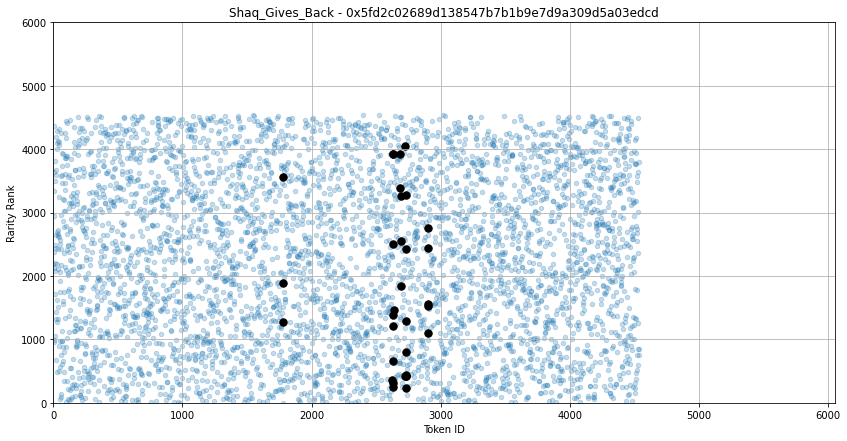

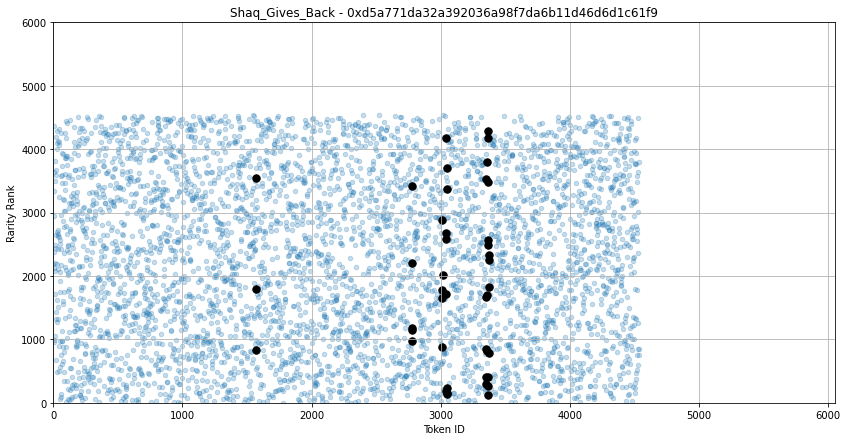

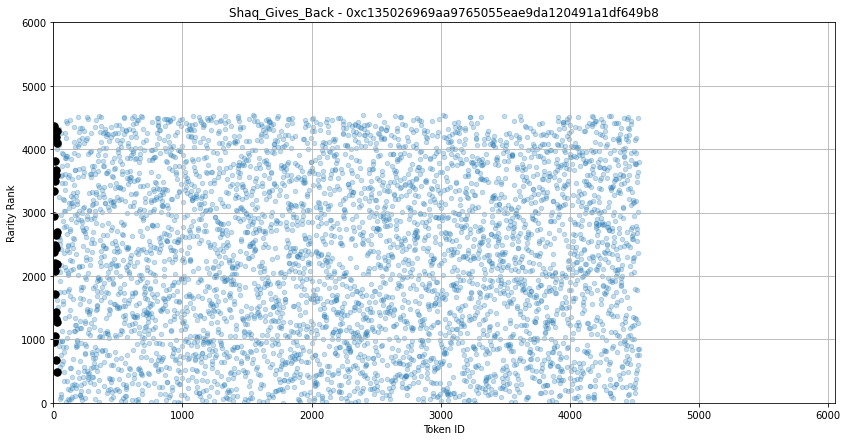

In [2]:
"""
Generate Plot
"""

PATH = "../metadata/rarity_data/{}_raritytools.csv".format(FILE)
MINT_PATH = "../minting_data/{}_minting.csv".format(FILE)
RARITY_DB = pd.read_csv(PATH)
RARITY_DB = RARITY_DB[RARITY_DB["TOKEN_ID"].duplicated() == False]
MINTING_DB = pd.read_csv(MINT_PATH)

addresses = set(MINTING_DB["to_account"].unique())

if ADDRESS != "":
    print_graph(ADDRESS, MINTING_DB, RARITY_DB, zoom_in=ZOOM_IN)
else:
    for address in addresses:
        print_graph(address, MINTING_DB, RARITY_DB, zoom_in=ZOOM_IN)